# Credit Card Fraud Detection with Machine Learning
## by Diego Garrocho
---

1. Introduction
2. Data Exploration and Analysis
3. Feature Engineering
4. Model Selection
5. Model Evaluation
6. Model Interpretation
7. Conclusion


### Introduction
---
Credit card fraud is a major issue for both individuals and financial institutions. With the increasing use of credit cards in daily transactions, detecting fraudulent activities is becoming more challenging. However, machine learning has shown great potential in detecting fraudulent transactions in credit card data. This project aims to showcase the application of machine learning techniques in detecting fraudulent transactions in credit card data. We will explore different machine learning models and evaluate their performance in detecting fraudulent transactions. The project will also provide insights into the features that are most important in detecting fraudulent transactions.

### Data Exploration and Analysis
---

The data set used in this project was obtained from Kaggle. 

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
import xgboost as xgb


In [3]:
cc_df = pd.read_csv (r'C:\Users\logan\Desktop\CC Fraud files\creditcard.csv')
test_s = pd.read_csv (r'C:\Users\logan\Desktop\CC Fraud files\test.csv')

In [3]:
cc_df.info()
print('_'*99)
cc_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<AxesSubplot:>

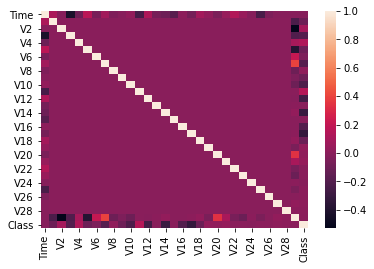

In [4]:
sns.heatmap(cc_df.corr())

<AxesSubplot:xlabel='Class', ylabel='Amount'>

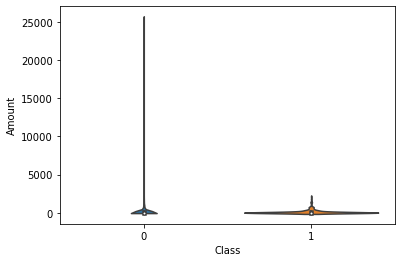

In [5]:
sns.violinplot(x="Class", y="Amount", data=cc_df)

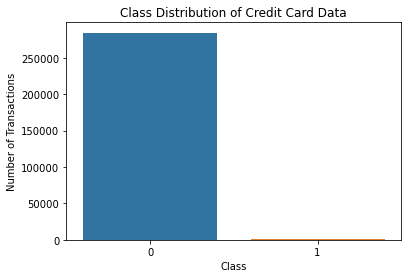

In [6]:
class_distribution = cc_df['Class'].value_counts()

sns.barplot(x=class_distribution.index, y=class_distribution.values)

plt.xlabel("Class")
plt.ylabel("Number of Transactions")
plt.title("Class Distribution of Credit Card Data")

plt.show()

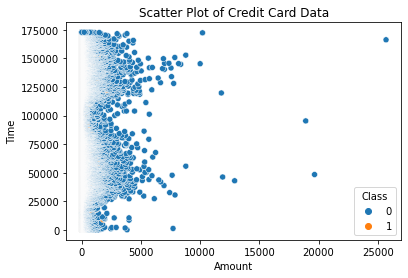

In [7]:
sns.scatterplot(x='Amount', y='Time', hue='Class', data=cc_df)
plt.xlabel("Amount")
plt.ylabel("Time")
plt.title("Scatter Plot of Credit Card Data")

plt.show()

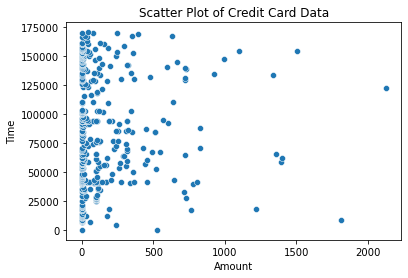

In [8]:
class_1_data = cc_df.loc[cc_df['Class'] == 1]
sns.scatterplot(x='Amount', y='Time', data=class_1_data)
plt.xlabel("Amount")
plt.ylabel("Time")
plt.title("Scatter Plot of Credit Card Data")

plt.show()

In [9]:
class_1_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [4]:
#Dataset split for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cc_df.drop('Class', axis=1), cc_df['Class'], test_size=0.2, random_state=42)

Since the dataset had already been processed by the publisher, no transformation other than splitting the dataset into train and test was applied. For the resulting datasets it was decided that the split would be 80/20 as is common practice. 
Through visualization, we can further our understanding of the characteristics of the positve frauds. 

### Feauture Engineering
---

The data has already been scaled with the exception of features regarding time and amount of the transactions. The original state of the features appears to be satisfactory for use.

### Model Selection
---
In this case, the initial idea was to use outlier detection, but other techniques such as logistic regression, decision trees, random forests, or neural networks should be considered after visualizing the data distribution.

A number of models could be used: Logistic regression, Decision trees, Random forests, Gradient boosted trees, Neural networks. 

In [11]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [12]:
#Desicion Trees 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)

In [5]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

In [9]:
test_su = test_s.drop(['id'], axis=1)
y_pred_s = clf_rf.predict(test_su)

sub = pd.DataFrame({'id': test_s['id'], 'Class': y_pred_s})

sub.to_csv('submission.csv', index=False)

In [14]:
#Gradient boosted trees
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 3,
    'learning_rate': 0.1,
    'num_boost_round': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

xgb_model = xgb.train(params, dtrain)
y_pred_xgb = xgb_model.predict(dtest)

[09:13:18] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



In [15]:
#Neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(Dense(32, input_dim=30, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

y_pred_m1 = model1.predict(X_test)

Epoch 1/50
7121/7121 [==============================] - 7s 889us/step - loss: 21.1070 - accuracy: 0.9954 - val_loss: 0.0224 - val_accuracy: 0.9983
Epoch 2/50
7121/7121 [==============================] - 6s 868us/step - loss: 0.0750 - accuracy: 0.9980 - val_loss: 0.0129 - val_accuracy: 0.9983
Epoch 3/50
7121/7121 [==============================] - 6s 864us/step - loss: 0.0158 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 4/50
7121/7121 [==============================] - 6s 866us/step - loss: 0.0220 - accuracy: 0.9982 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 5/50
7121/7121 [==============================] - 6s 870us/step - loss: 0.0233 - accuracy: 0.9982 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 6/50
7121/7121 [==============================] - 6s 868us/step - loss: 0.0374 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 7/50
7121/7121 [==============================] - 6s 866us/step - loss: 0.0162 - accuracy: 0.9983 - val_loss: 0.0127 

In [21]:
model2 = Sequential()
model2.add(Dense(128, input_dim=30, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

y_pred_m2 = model2.predict(X_test)

Epoch 1/100
7121/7121 [==============================] - 9s 1ms/step - loss: 8.1988 - accuracy: 0.9959 - val_loss: 0.0215 - val_accuracy: 0.9983
Epoch 2/100
7121/7121 [==============================] - 8s 1ms/step - loss: 0.1121 - accuracy: 0.9981 - val_loss: 0.0128 - val_accuracy: 0.9983
Epoch 3/100
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0384 - accuracy: 0.9982 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 4/100
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0507 - accuracy: 0.9981 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 5/100
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0294 - accuracy: 0.9981 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 6/100
7121/7121 [==============================] - 8s 1ms/step - loss: 0.1048 - accuracy: 0.9980 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 7/100
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0477 - accuracy: 0.9981 - val_loss: 0.0127 - val_ac

### Model Eval
---
This section should cover the evaluation of the selected machine learning models. It should include the performance metrics used to evaluate the models, such as precision, recall, and F1-score. It should also include the comparison of the models' performance to determine the best performing model.

In [24]:
#Logistic Regression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score, matthews_corrcoef

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auprc = auc(recall, precision)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("AUPRC:", auprc)
print("F1:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("MCC:", mcc)

AUPRC: 0.678408313104627
F1: 0.6459627329192548
Precision: 0.8253968253968254
Recall: 0.5306122448979592
MCC: 0.6613449759956226


In [25]:
#Decision Trees
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_dt)
auprc_dt = auc(recall, precision)
f1_dt = f1_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
mcc_dt = matthews_corrcoef(y_test, y_pred_dt)

print("AUPRC:", auprc_dt)
print("F1:", f1_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("MCC:", mcc_dt)

AUPRC: 0.7771737809908621
F1: 0.7657142857142857
Precision: 0.8701298701298701
Recall: 0.6836734693877551
MCC: 0.7709469562850108


In [26]:
#Random Forest
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
auprc_rf = auc(recall, precision)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)

print("AUPRC:", auprc_rf)
print("F1:", f1_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("MCC:", mcc_rf)

AUPRC: 0.8698679372160941
F1: 0.8571428571428571
Precision: 0.974025974025974
Recall: 0.7653061224489796
MCC: 0.8631826952924256


In [32]:
#XGB
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xgb)
auprc_xgb = auc(recall, precision)

print("AUPRC:", auprc_xgb)

AUPRC: 0.855820203293364


In [34]:
#NN1
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_m1)
auprc_m1 = auc(recall, precision)

print("AUPRC:", auprc_m1)

AUPRC: 0.5008615990575161


In [22]:
#NN2
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_m2)
auprc_m2 = auc(recall, precision)

print("AUPRC:", auprc_rf)

AUPRC: 0.5008607061303355


### Model Interpretation
---


After evaluating multiple models, it was determined that the best preforming model was Random Forest. These results show how well the model preformed in predicting the positive class:

The AUPRC of 0.87 indicates that the model has a good balance between precision and recall. This is particularly important in imbalanced datasets where the negative class is dominant.

The F1 score of 0.85 is a harmonic mean of precision and recall, indicating that the model has a good balance between these two metrics.

The precision of 0.97 indicates that the model correctly predicted 97% of the positive class instances among all instances that were predicted as positive.

The recall of 0.77 indicates that the model correctly identified 77% of all positive instances in the dataset.

The MCC of 0.86 indicates that the model has a good overall performance in predicting both the positive and negative classes.

### Conclusion
---
This section should summarize the findings of the project and draw conclusions based on the results obtained. It should also include recommendations for future work and improvements to the model. 
As demonstrated by the project, there are multiple models than can be implemented on credit card transactions to determine possible fraudulent ones with sufficient accuracy to be considered as helpful tools to iad in fraud detection. In this particular case, using Random Forest proved to be the best preforming model but it should be noted that this result is highly dependant on the data available for the project and is expected to change to better fit the needs of each individual project. Machine learning proves to be an incredibly powerful tool than has great potential to be exploited in Fraud detection even more than it is currently given that the ML field is always in constant development. 